In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [17]:
B_datos = 'C:/Users/Juan David/Documents/Base de Datos/arabica_data_cleaned.csv '
datos = pd.read_csv(B_datos)

In [18]:
# Mostrar las primeras filas y un resumen general de la base de datos
datos.head(), datos.info(), datos.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1001 non-null   object 
 7   ICO.Number             1163 non-null   object 
 8   Company                1102 non-null   object 
 9   Altitude               1088 non-null   object 
 10  Region                 1254 non-null   object 
 11  Producer               1081 non-null   object 
 12  Number.of.Bags         1311 non-null   int64  
 13  Bag.Weight             1311 non-null   object 
 14  In.Country.Partner     1311 non-null   object 
 15  Harv

(   Unnamed: 0  Species                     Owner Country.of.Origin  \
 0           1  Arabica                 metad plc          Ethiopia   
 1           2  Arabica                 metad plc          Ethiopia   
 2           3  Arabica  grounds for health admin         Guatemala   
 3           4  Arabica       yidnekachew dabessa          Ethiopia   
 4           5  Arabica                 metad plc          Ethiopia   
 
                                   Farm.Name Lot.Number       Mill ICO.Number  \
 0                                 metad plc        NaN  metad plc  2014/2015   
 1                                 metad plc        NaN  metad plc  2014/2015   
 2  san marcos barrancas "san cristobal cuch        NaN        NaN        NaN   
 3     yidnekachew dabessa coffee plantation        NaN    wolensu        NaN   
 4                                 metad plc        NaN  metad plc  2014/2015   
 
                                  Company       Altitude  ...  Color  \
 0      meta

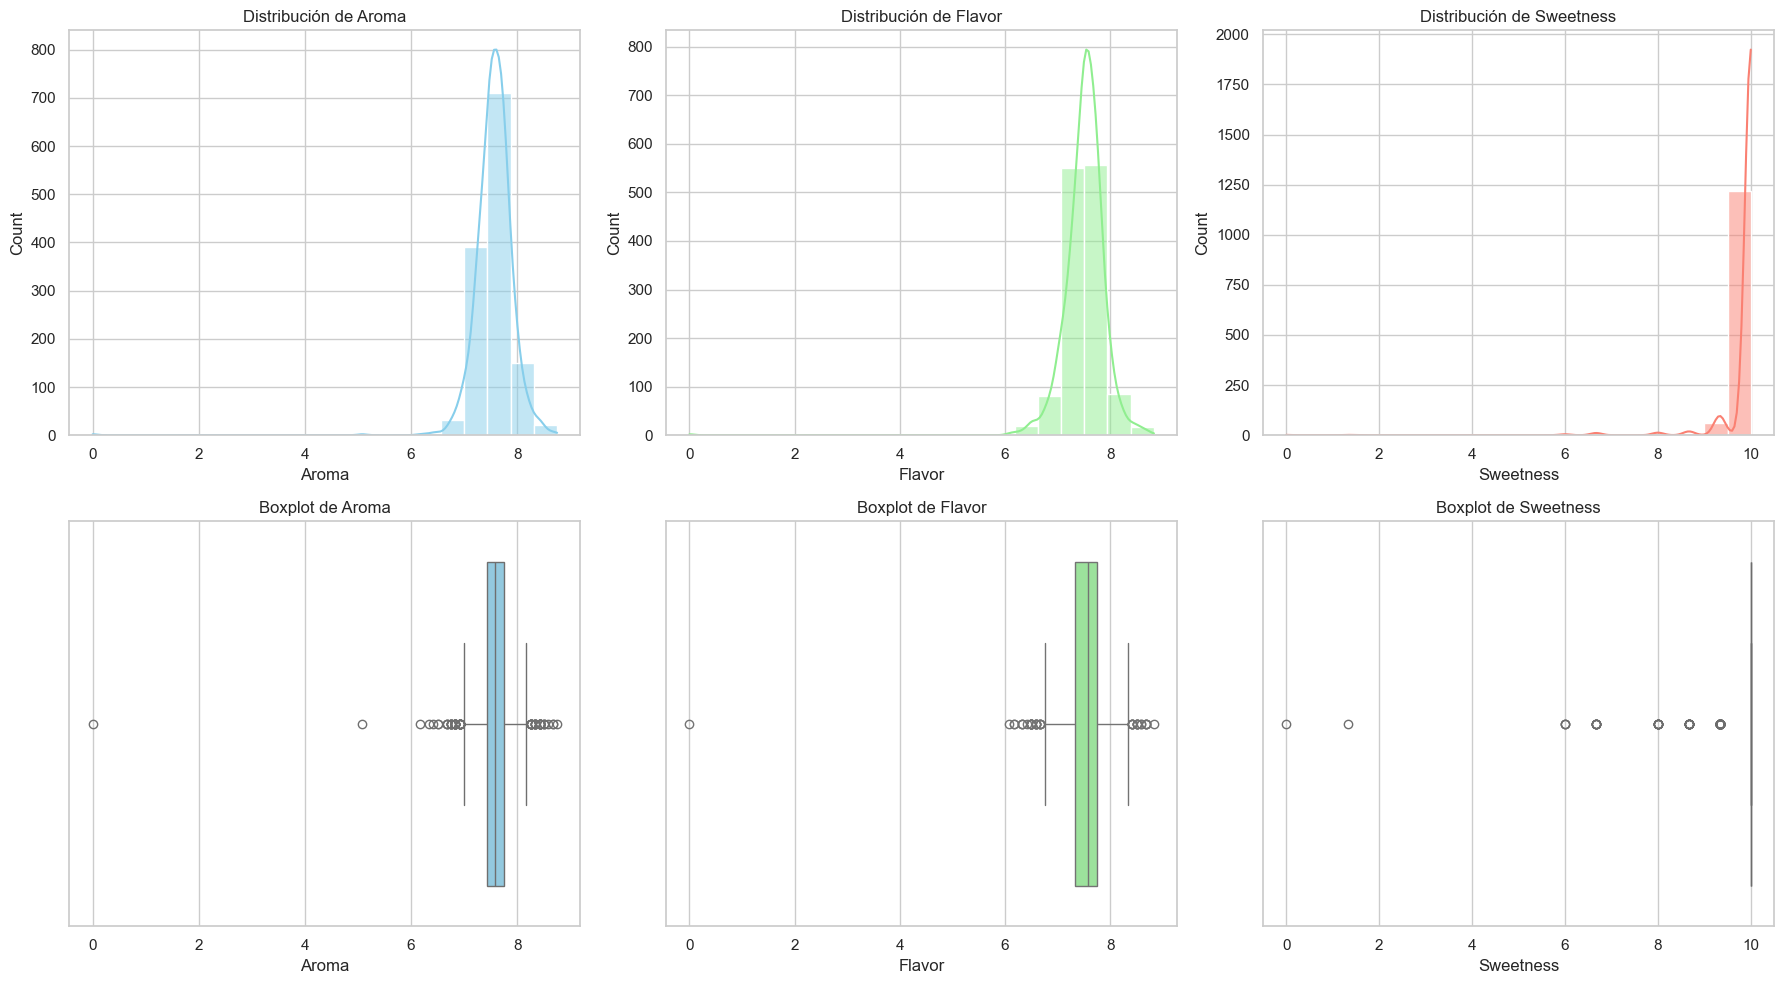

In [19]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con subplots para las tres variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Histogramas
sns.histplot(datos['Aroma'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
sns.histplot(datos['Flavor'], bins=20, kde=True, ax=axes[0, 1], color='lightgreen')
sns.histplot(datos['Sweetness'], bins=20, kde=True, ax=axes[0, 2], color='salmon')

# Boxplots
sns.boxplot(x=datos['Aroma'], ax=axes[1, 0], color='skyblue')
sns.boxplot(x=datos['Flavor'], ax=axes[1, 1], color='lightgreen')
sns.boxplot(x=datos['Sweetness'], ax=axes[1, 2], color='salmon')

# Configurar títulos y etiquetas
axes[0, 0].set_title('Distribución de Aroma')
axes[0, 1].set_title('Distribución de Flavor')
axes[0, 2].set_title('Distribución de Sweetness')

axes[1, 0].set_title('Boxplot de Aroma')
axes[1, 1].set_title('Boxplot de Flavor')
axes[1, 2].set_title('Boxplot de Sweetness')

# Mostrar la gráfica
plt.tight_layout()
plt.show() 

In [20]:
# Calcular medidas para Aroma, Flavor y Sweetness
variables = ['Aroma', 'Flavor', 'Sweetness']
resultados = {}

for var in variables:
    data = datos[var].dropna()  # Eliminar cualquier valor faltante

    # Medidas de centralidad
    media = np.mean(data)
    mediana = np.median(data)

    # Medidas de dispersión
    desviacion_estandar = np.std(data)
    IQR = np.percentile(data, 75) - np.percentile(data, 25)

    # Medidas de simetría
    asimetria = stats.skew(data)
    coeficiente_bowley = (np.percentile(data, 75) + np.percentile(data, 25) - 2 * np.percentile(data, 50)) / IQR

    resultados[var] = {
        'Media': media,
        'Mediana': mediana,
        'Desviación Estándar': desviacion_estandar,
        'IQR': IQR,
        'Asimetría': asimetria,
        'Coeficiente de Bowley': coeficiente_bowley
    }

# Mostrar los resultados
resultados

C:\Users\Juan David\AppData\Local\Temp\ipykernel_17532\75884254.py:18: RuntimeWarning: invalid value encountered in scalar divide
  coeficiente_bowley = (np.percentile(data, 75) + np.percentile(data, 25) - 2 * np.percentile(data, 50)) / IQR


{'Aroma': {'Media': 7.563806254767353,
  'Mediana': 7.58,
  'Desviación Estándar': 0.3785218619728442,
  'IQR': 0.33000000000000007,
  'Asimetría': -6.299108204822756,
  'Coeficiente de Bowley': 0.03030303030302965},
 'Flavor': {'Media': 7.518070175438596,
  'Mediana': 7.58,
  'Desviación Estándar': 0.39982663819856384,
  'IQR': 0.41999999999999993,
  'Asimetría': -5.2175334706498875,
  'Coeficiente de Bowley': -0.1904761904761907},
 'Sweetness': {'Media': 9.903272311212813,
  'Mediana': 10.0,
  'Desviación Estándar': 0.5306292493762387,
  'IQR': 0.0,
  'Asimetría': -10.744020613589106,
  'Coeficiente de Bowley': nan}}

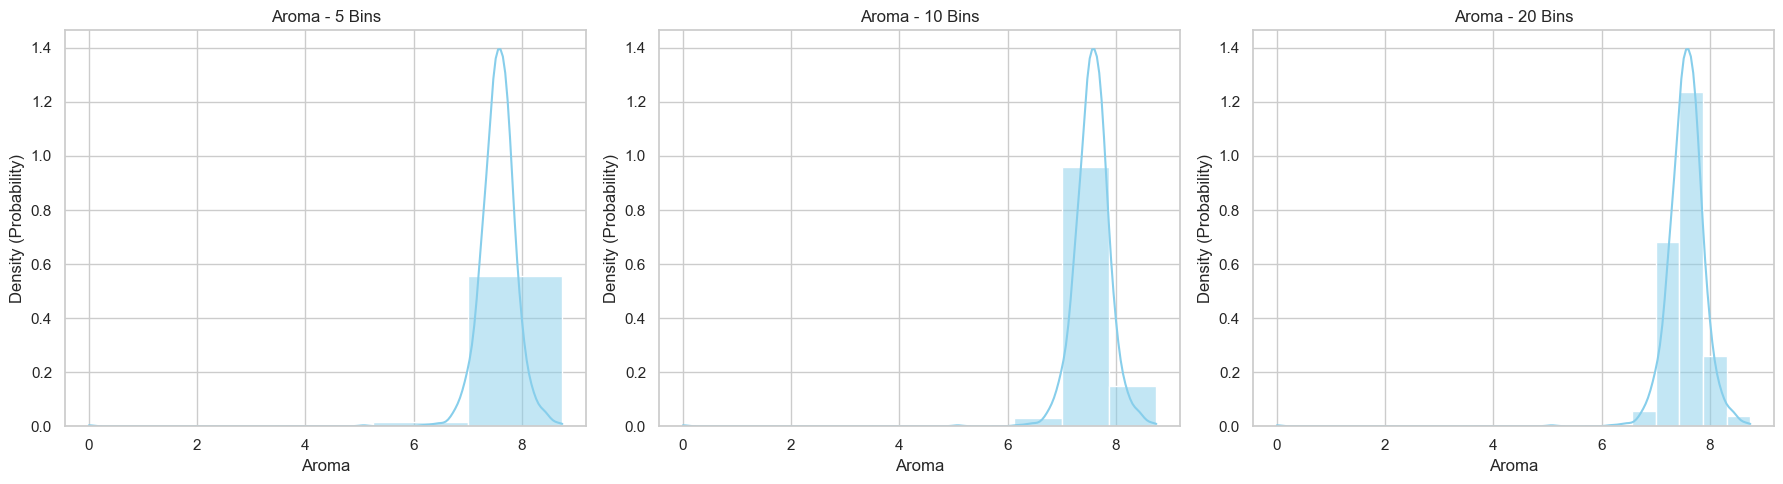

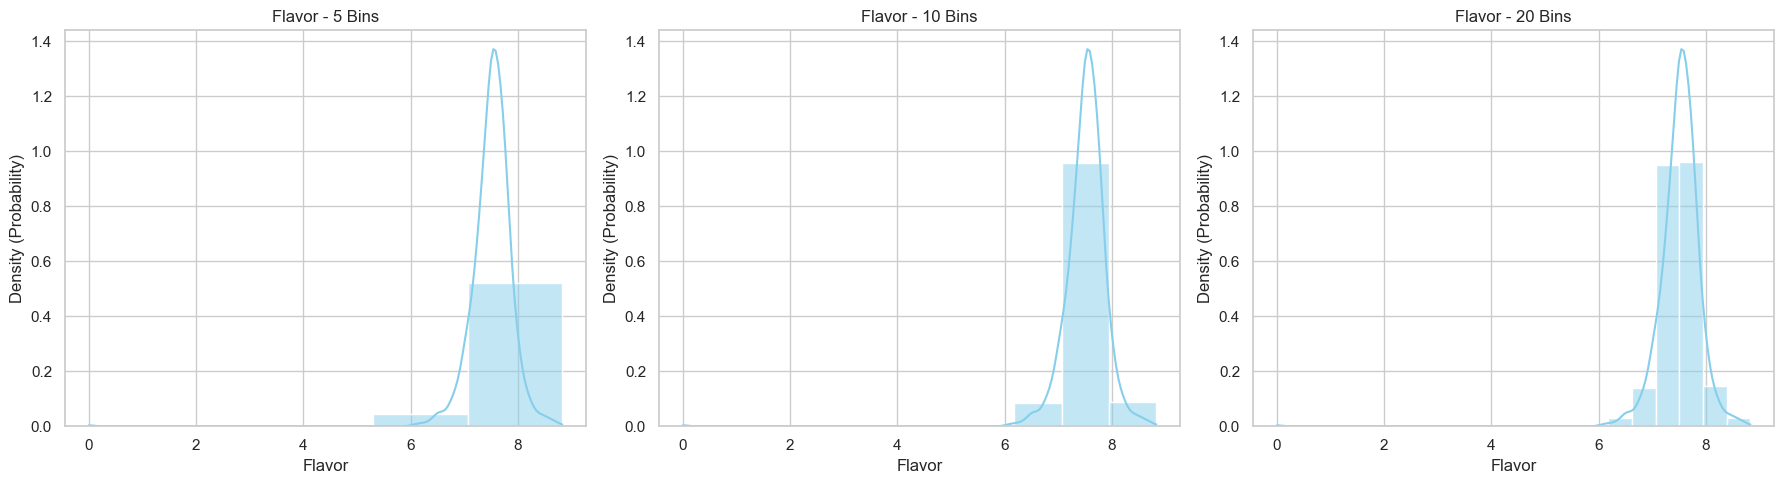

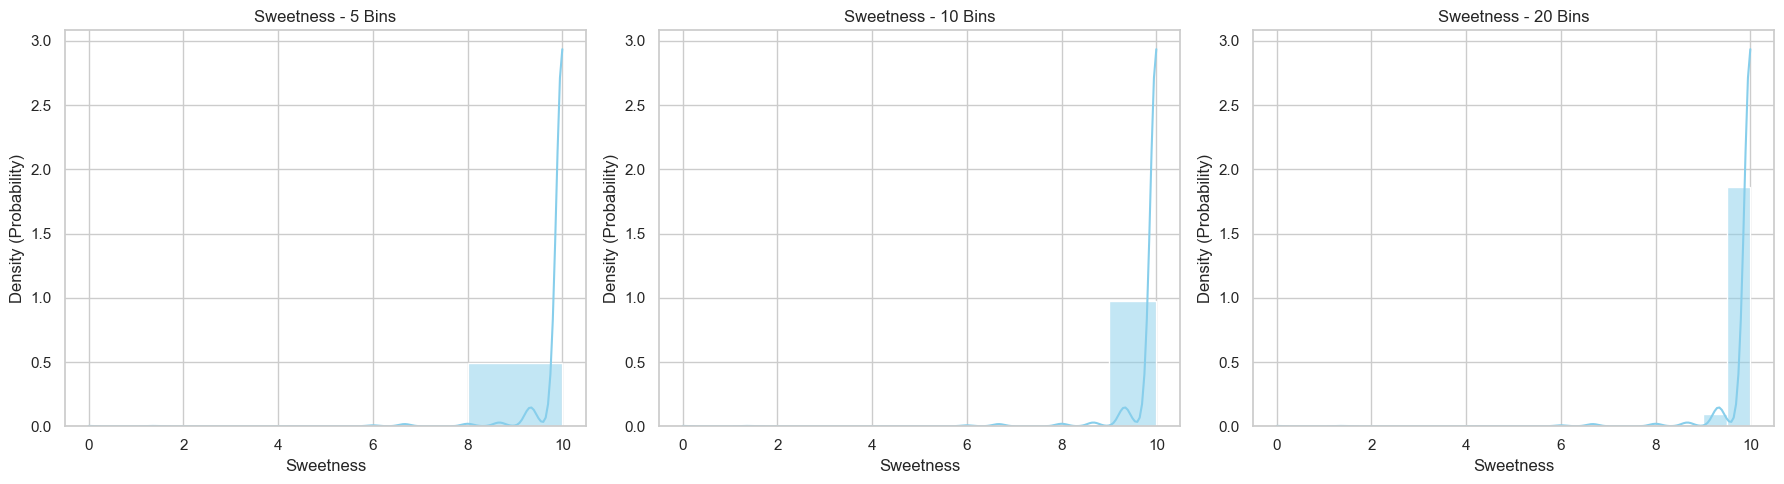

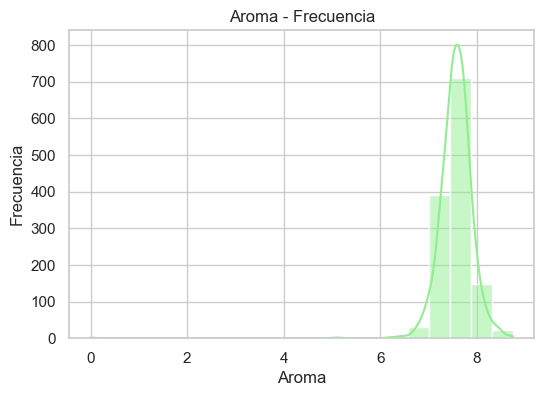

In [21]:
# Variables a analizar
variables = ['Aroma', 'Flavor', 'Sweetness']

# Definir los diferentes anchos de bin que vamos a explorar
bin_widths = [5, 10, 20]

# Crear una figura para los histogramas
for var in variables:
    plt.figure(figsize=(18, 5))
    
    for i, bin_width in enumerate(bin_widths):
        plt.subplot(1, 3, i + 1)
        sns.histplot(datos[var], bins=bin_width, kde=True, stat='density', color='skyblue')
        plt.title(f'{var} - {bin_width} Bins')
        plt.xlabel(var)
        plt.ylabel('Density (Probability)')
    
    plt.tight_layout()
    plt.show()

# Histograma con frecuencia
plt.figure(figsize=(6, 4))
sns.histplot(datos['Aroma'], bins=20, kde=True, stat='count', color='lightgreen')
plt.title('Aroma - Frecuencia')
plt.xlabel('Aroma')
plt.ylabel('Frecuencia')
plt.show()

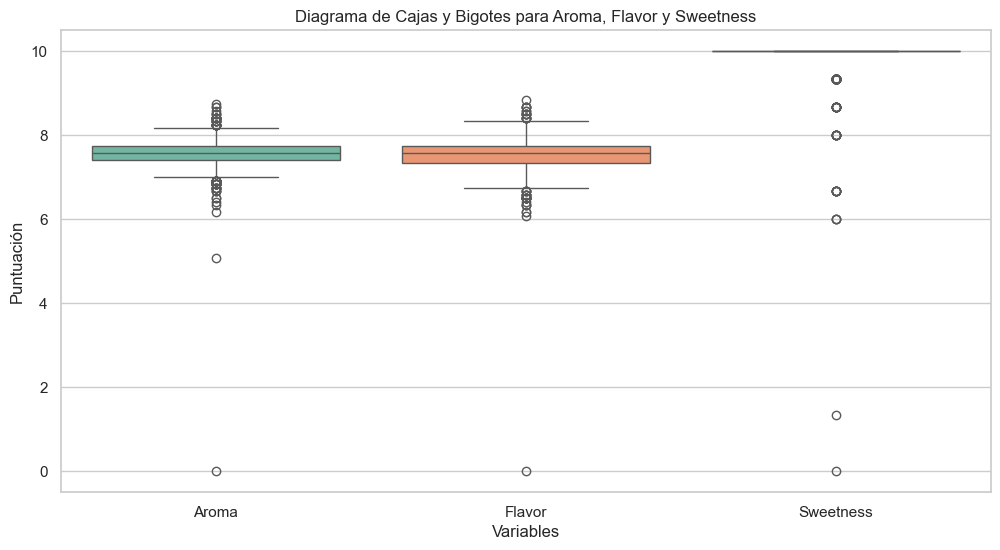

In [22]:
# Crear una figura para los boxplots
plt.figure(figsize=(12, 6))

# Crear un boxplot para cada variable
variables = ['Aroma', 'Flavor', 'Sweetness']
sns.boxplot(data=datos[variables], palette="Set2")

# Configurar títulos y etiquetas
plt.title('Diagrama de Cajas y Bigotes para Aroma, Flavor y Sweetness')
plt.xlabel('Variables')
plt.ylabel('Puntuación')

# Mostrar la gráfica
plt.show()

<Figure size 1000x400 with 0 Axes>

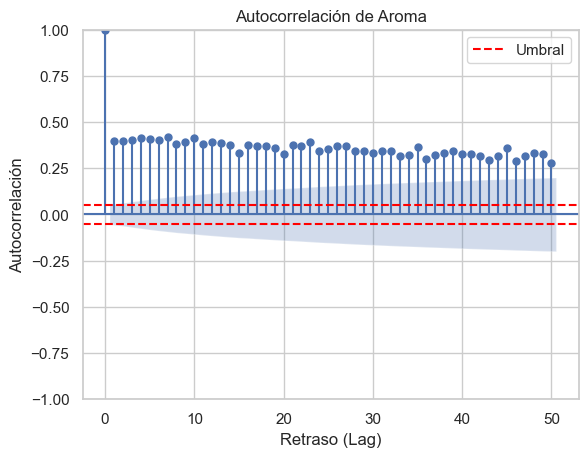

Para la variable Aroma, la autocorrelación cae por debajo del umbral de 0.05 en el lag None.


<Figure size 1000x400 with 0 Axes>

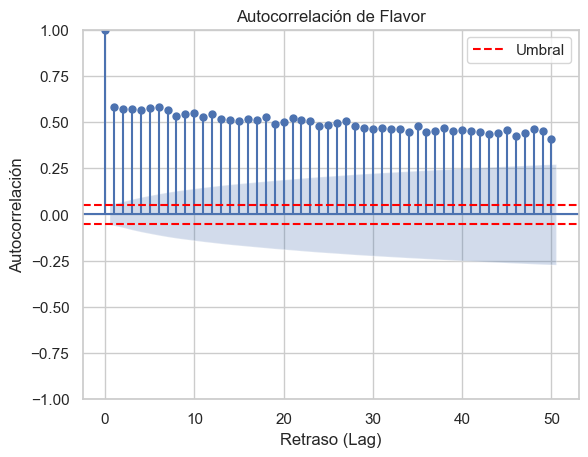

Para la variable Flavor, la autocorrelación cae por debajo del umbral de 0.05 en el lag None.


<Figure size 1000x400 with 0 Axes>

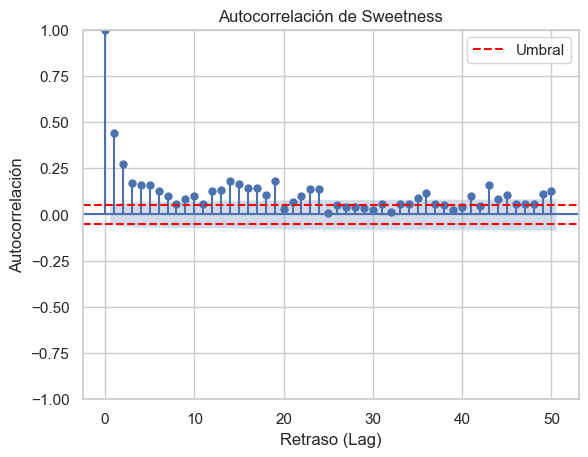

Para la variable Sweetness, la autocorrelación cae por debajo del umbral de 0.05 en el lag 25.


In [23]:
# Definir el umbral de autocorrelación
umbral = 0.05

# Variables a analizar
variables = ['Aroma', 'Flavor', 'Sweetness']

# Calcular y graficar la autocorrelación para cada variable
for var in variables:
    plt.figure(figsize=(10, 4))
    plot_acf(datos[var], lags=50, alpha=0.05, title=f'Autocorrelación de {var}')
    plt.axhline(y=umbral, linestyle='--', color='red', label='Umbral')
    plt.axhline(y=-umbral, linestyle='--', color='red')
    plt.xlabel('Retraso (Lag)')
    plt.ylabel('Autocorrelación')
    plt.legend()
    plt.show()

    # Determinar el primer lag donde la autocorrelación cae por debajo del umbral
    autocorrelations = [pd.Series(datos[var]).autocorr(lag) for lag in range(1, 51)]
    lag_critico = next((i for i, acf in enumerate(autocorrelations, start=1) if abs(acf) < umbral), None)
    print(f"Para la variable {var}, la autocorrelación cae por debajo del umbral de {umbral} en el lag {lag_critico}.")

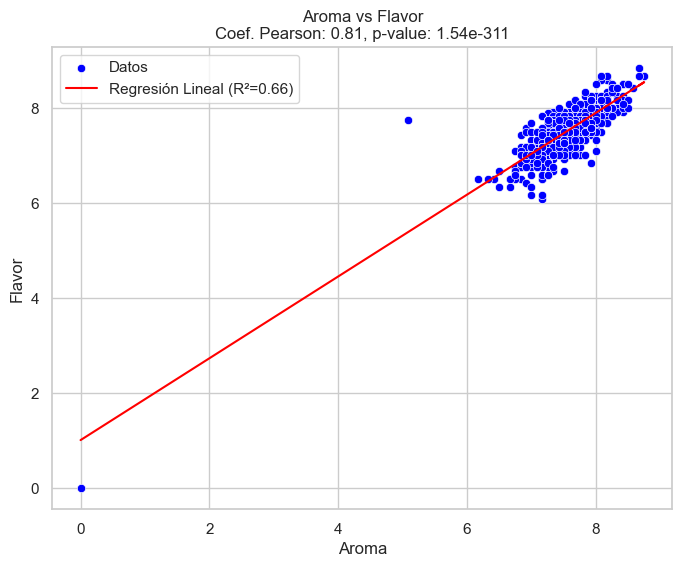

Relación entre Aroma y Flavor:
Coeficiente de Pearson: 0.81
p-value: 1.54e-311
Pendiente: 0.86
Intersección: 1.01
Coeficiente de determinación (R²): 0.66



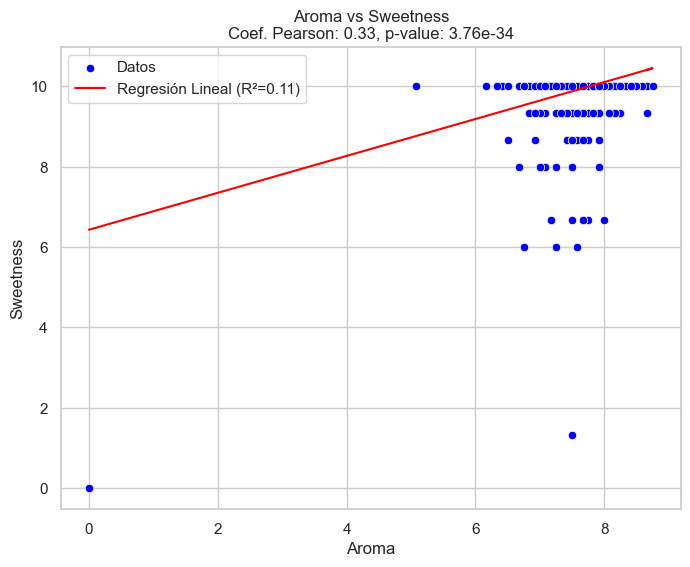

Relación entre Aroma y Sweetness:
Coeficiente de Pearson: 0.33
p-value: 3.76e-34
Pendiente: 0.46
Intersección: 6.43
Coeficiente de determinación (R²): 0.11



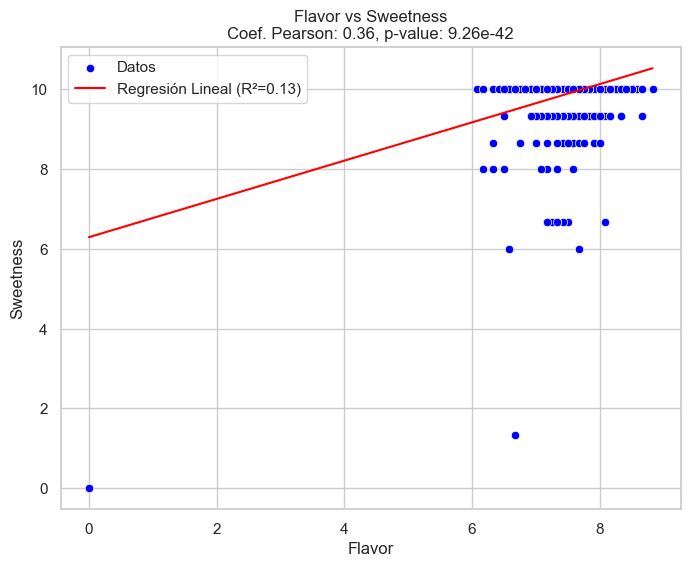

Relación entre Flavor y Sweetness:
Coeficiente de Pearson: 0.36
p-value: 9.26e-42
Pendiente: 0.48
Intersección: 6.30
Coeficiente de determinación (R²): 0.13



In [24]:
# Definir las combinaciones de variables a analizar
combinaciones = [('Aroma', 'Flavor'), ('Aroma', 'Sweetness'), ('Flavor', 'Sweetness')]

# Crear un modelo de regresión lineal
modelo = LinearRegression()

for var1, var2 in combinaciones:
    # Calcular el coeficiente de correlación de Pearson
    coef_pearson, p_value = pearsonr(datos[var1], datos[var2])
    
    # Ajustar el modelo de regresión lineal
    X = datos[[var1]].values
    y = datos[var2].values
    modelo.fit(X, y)
    y_pred = modelo.predict(X)
    
    # Calcular el coeficiente de determinación R^2
    r2 = modelo.score(X, y)
    
    # Graficar los datos y la recta de regresión
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=var1, y=var2, data=datos, color='blue', label='Datos')
    plt.plot(datos[var1], y_pred, color='red', label=f'Regresión Lineal (R²={r2:.2f})')
    
    # Configurar etiquetas y título
    plt.title(f'{var1} vs {var2}\nCoef. Pearson: {coef_pearson:.2f}, p-value: {p_value:.2e}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()
    plt.show()
    
    # Mostrar los resultados de la regresión
    print(f"Relación entre {var1} y {var2}:")
    print(f"Coeficiente de Pearson: {coef_pearson:.2f}")
    print(f"p-value: {p_value:.2e}")
    print(f"Pendiente: {modelo.coef_[0]:.2f}")
    print(f"Intersección: {modelo.intercept_:.2f}")
    print(f"Coeficiente de determinación (R²): {r2:.2f}\n")